Mean Squared Error: 41957.44411518248
R² Score: 0.8566680539323313


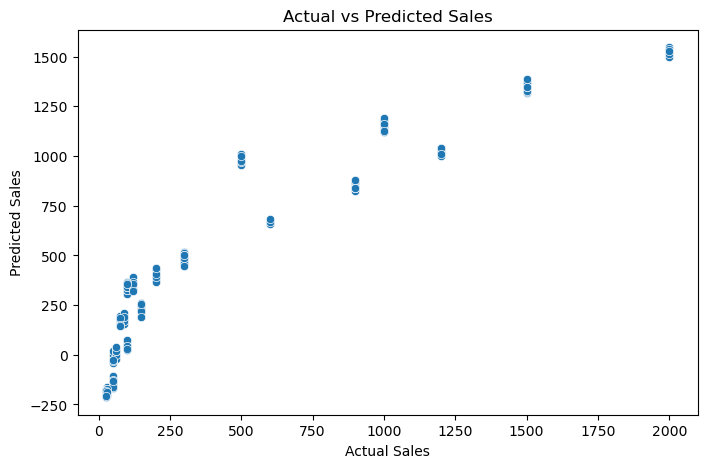

In [38]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("retail_sales_dataset.csv");



# Clean data: remove null values
df.dropna(inplace=True)

# Encode categorical columns (e.g. Region, Product Category, Gender, etc.)
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Features (X) and Target (y) -> Predict "Sales"
X = df.drop(columns=["Total Amount"])  
y = df["Total Amount"]

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Compare actual vs predicted
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


Random Forest R² Score: 1.0
Random Forest MSE: 0.0


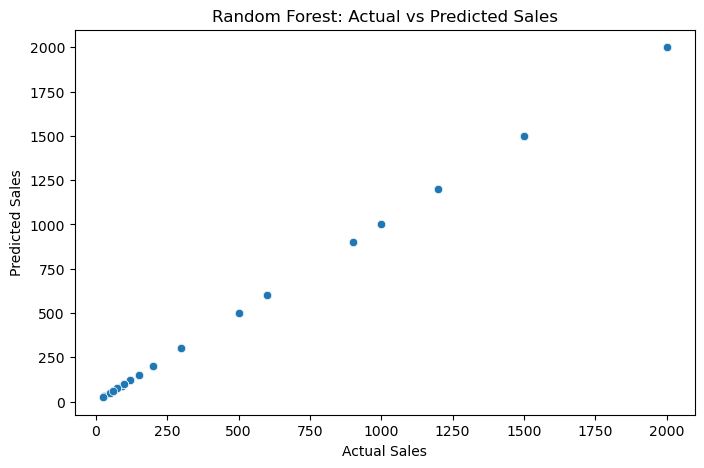

In [39]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("Random Forest R² Score:", r2_score(y_test, y_pred_rf))
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))

# Plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Random Forest: Actual vs Predicted Sales")
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_260\4101326761.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Product Category", y="Total Amount", data=df, estimator=sum, palette="viridis")
C:\Users\hp\AppData\Local\Temp\ipykernel_260\4101326761.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=X.columns, palette="magma")


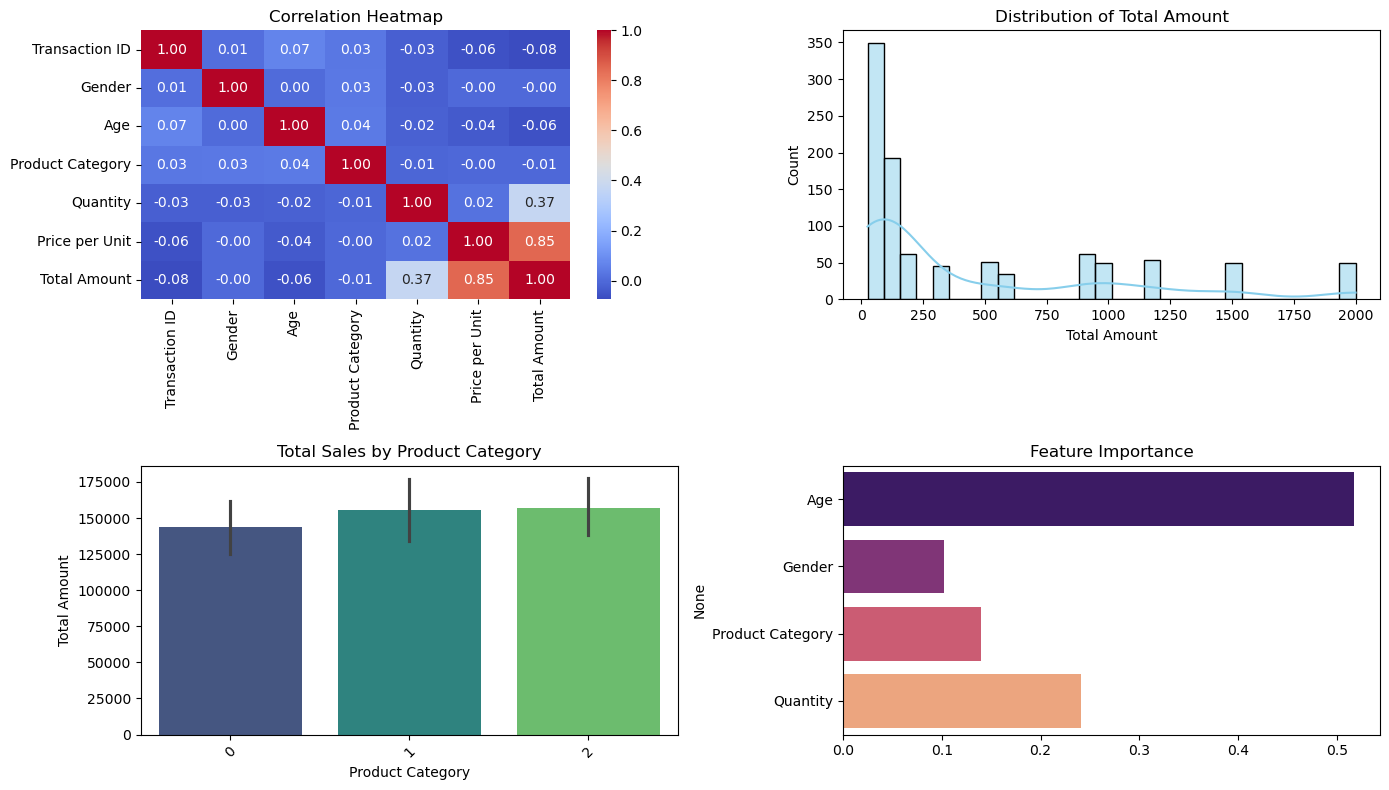

In [48]:
# ================= GRAPHICS =================
plt.figure(figsize=(14, 8))

# 1. Correlation heatmap (numeric columns only)
plt.subplot(2, 2, 1)
sns.heatmap(df.select_dtypes(include=["number"]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")

# 2. Distribution of Total Amount
plt.subplot(2, 2, 2)
sns.histplot(df["Total Amount"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Total Amount")

# 3. Sales by Product Category
plt.subplot(2, 2, 3)
sns.barplot(x="Product Category", y="Total Amount", data=df, estimator=sum, palette="viridis")
plt.title("Total Sales by Product Category")
plt.xticks(rotation=45)

# 4. Feature Importance
plt.subplot(2, 2, 4)
importances = model.feature_importances_
sns.barplot(x=importances, y=X.columns, palette="magma")
plt.title("Feature Importance")

plt.tight_layout()
plt.show()



=== MODEL PERFORMANCE ===
MAE  : 0.00
MSE  : 0.00
RMSE : 0.00
R²   : 1.00


C:\Users\hp\AppData\Local\Temp\ipykernel_260\1848779474.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Product Category", y="Total Amount", data=df, estimator=sum, palette="viridis")
C:\Users\hp\AppData\Local\Temp\ipykernel_260\1848779474.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=X.columns, palette="magma")


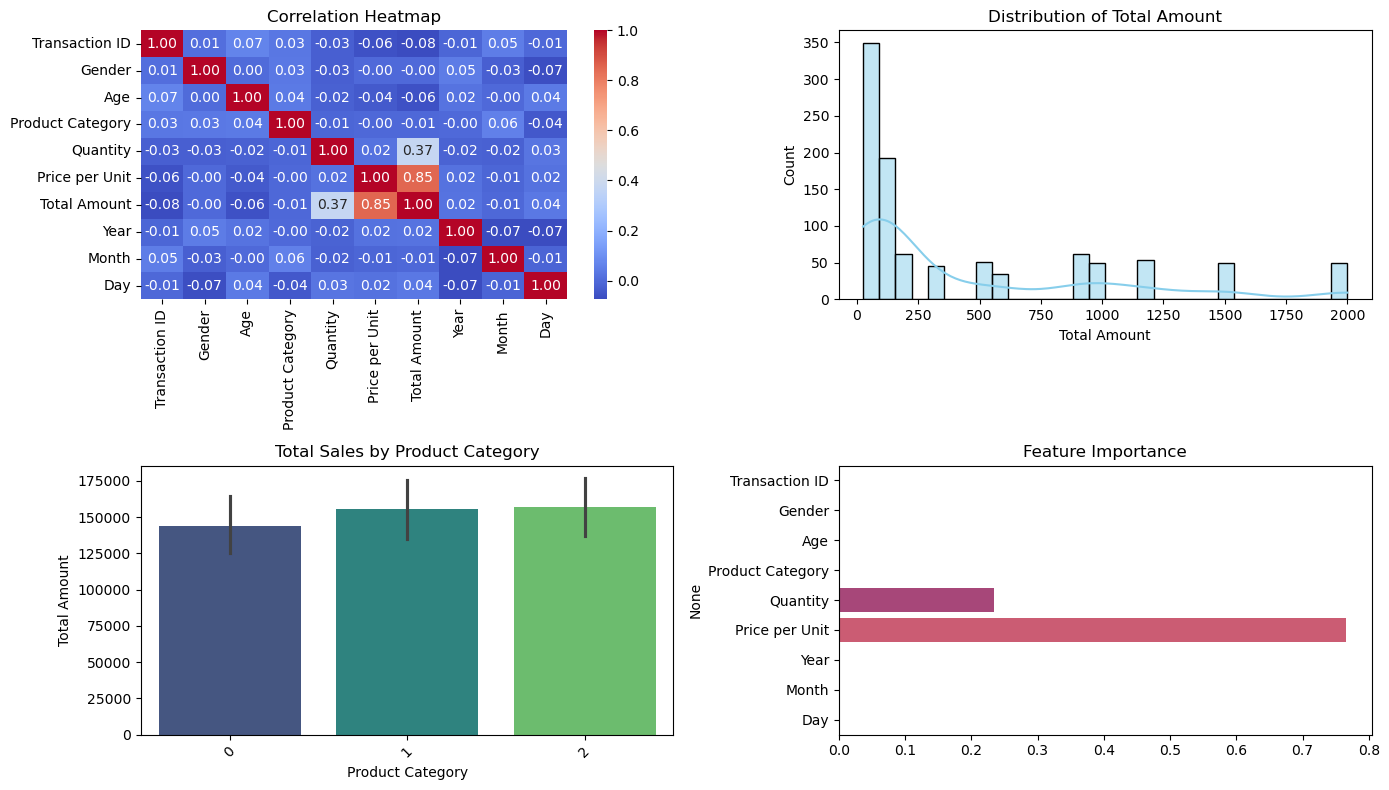

In [52]:
# ================= IMPORTS =================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# ================= LOAD DATA =================
df = pd.read_csv("retail_sales_dataset.csv")

# ================= PREPROCESSING =================
# Convert Date column
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df.drop("Date", axis=1, inplace=True)  # drop original string Date

# Encode categorical features
le_gender = LabelEncoder()
df["Gender"] = le_gender.fit_transform(df["Gender"])

le_product = LabelEncoder()
df["Product Category"] = le_product.fit_transform(df["Product Category"])

# Define features and target
X = df.drop(columns=["Total Amount", "Customer ID"])  # drop target + identifier
y = df["Total Amount"]

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ================= MODEL TRAINING =================
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ================= VALIDATION =================
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n=== MODEL PERFORMANCE ===")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.2f}")

# ================= GRAPHICS =================
plt.figure(figsize=(14, 8))

# 1. Correlation heatmap (numeric columns only)
plt.subplot(2, 2, 1)
sns.heatmap(df.select_dtypes(include=["number"]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")

# 2. Distribution of Total Amount
plt.subplot(2, 2, 2)
sns.histplot(df["Total Amount"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Total Amount")

# 3. Sales by Product Category
plt.subplot(2, 2, 3)
sns.barplot(x="Product Category", y="Total Amount", data=df, estimator=sum, palette="viridis")
plt.title("Total Sales by Product Category")
plt.xticks(rotation=45)

# 4. Feature Importance
plt.subplot(2, 2, 4)
importances = model.feature_importances_
sns.barplot(x=importances, y=X.columns, palette="magma")
plt.title("Feature Importance")

plt.tight_layout()
plt.show()


In [53]:
from sklearn.model_selection import cross_val_score

# 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-Validation R² Scores:", cv_scores)
print("Average R²:", cv_scores.mean())


Cross-Validation R² Scores: [1. 1. 1. 1. 1.]
Average R²: 1.0


In [54]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='r2'
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV R² Score:", grid_search.best_score_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV R² Score: 1.0


In [55]:
import joblib

# Save model
joblib.dump(model, "sales_model.pkl")

# Later load model
loaded_model = joblib.load("sales_model.pkl")


In [64]:
# app.py
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import pandas as pd

# Load your trained model
model = joblib.load("sales_model.pkl")

# Define input structure for API
class SalesInput(BaseModel):
    store: str
    item: str
    day_of_week: int
    month: int

app = FastAPI()

@app.get("/")
def home():
    return {"message": "Sales Prediction API is running!"}

@app.post("/predict")
def predict(data: SalesInput):
    # Convert input to DataFrame
    input_df = pd.DataFrame([data.dict()])

    # If your model pipeline already handles encoding (OneHotEncoder, ColumnTransformer, etc.)
    # you don’t need separate label encoders
    prediction = model.predict(input_df)[0]

    return {"predicted_sales": float(prediction)}


In [65]:
%%writefile main.py
from fastapi import FastAPI
import pickle
import numpy as np

app = FastAPI()

model = pickle.load(open("sales_model.pkl", "rb"))

@app.get("/")
def home():
    return {"message": "Sales Forecast API is running!"}

@app.post("/predict")
def predict(features: list):
    features = np.array(features).reshape(1, -1)
    prediction = model.predict(features)
    return {"prediction": prediction.tolist()}


Overwriting main.py
